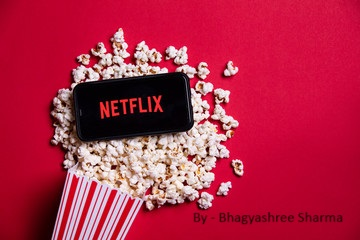

In [2]:
!pip install wordcloud

In [3]:
pip install Pillow==9.5.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont

## Downloading the dataset

In [5]:
df = pd.read_csv(r"C:\Users\bsbha\OneDrive\Desktop\Scaler\Sacler Case Studies\Case Study 2 - Netflix\netflix.csv")

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### It can be seen that the dataset is Netflix content database and contains data about title, director, duration, release_year, rating etc. of movies / TV shows. Let's do some basic analysis.

## Basic Analysis

In [7]:
df.shape

(8807, 12)

#### Based on the above output, we can see that our dataset contains a total of 8807 rows and 12 columns. Let's find out more about our data doing some basic exploratory ananlysis.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Let's find out how many unique TV Show / Movies are there in our dataset by using nunique function on the show_id column.

In [10]:
df['show_id'].nunique()

8807

In [11]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [12]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s5190,Movie,Rolling Thunder Revue: A Bob Dylan Story by Ma...,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [114]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


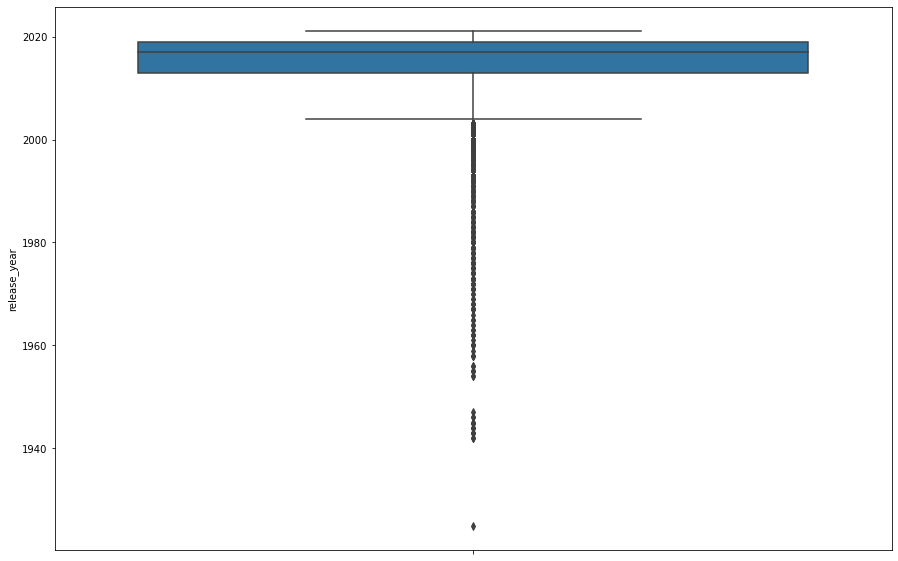

In [118]:
plt.figure(figsize=(15,10))
sns.boxplot(x='release_year', data=df, orient='v')

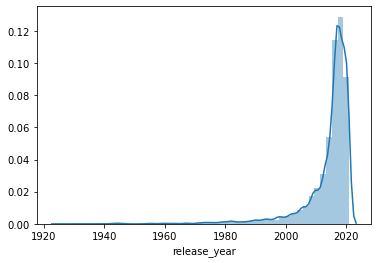

In [121]:
sns.distplot(df['release_year'])

#### It can be seen that there are a lot of outliers in the release_year. This box plot shows that data before the year 2003-2002 exist in outliers and can be avoided in future analysis. Relevant data in release_year is from the year 2002-2003 to 2021 and could be used in future analysis.

## Data Cleaning

In [13]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#### From the above output, we can see that there are certain columns that contain null values which can make our dataset a bit skewed and we can remove these datafields to get the authentic inference from our data, however, observe that in some fields there are so many null values that removing those rows might entirely delete important data that may come out of other columns. Hence it would be prudent to fill the null values with some realistic values keeping the ingenuity of data as it is.

#### Let's fill these null values to get a proper dataset to work on.

In [14]:
df['director'].fillna('Unknown Director',inplace=True)
df['cast'].fillna('Unknown Actor',inplace=True)
df['country'].fillna('Unknown country',inplace=True)
df['date_added'].fillna('Unknown Date',inplace=True)
df['rating'].fillna('Unknown Rating',inplace=True)
df['duration'].fillna('Unknown duration',inplace=True)

In [15]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [16]:
df.isna().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
8802    0
8803    0
8804    0
8805    0
8806    0
Length: 8807, dtype: int64

In [18]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### From the above output we can see that all the null values are replaced by some more realistic values. However we can see that in some columns the values are comma separated and contain vital information about the cast, genre and region / country of production. It is important to separate these values from one another to get a proper insight of the data.

In [19]:
new_df = pd.DataFrame(df.cast.str.split(',').to_list(), index=df.show_id).stack()
new_df = new_df.reset_index([0, 'show_id'])
new_df.columns = ['show_id', 'Cast']

In [21]:
new_df = new_df.explode('Cast')
new_df.head(5)

,show_id,Cast
0,s1,Unknown Actor
1,s2,Ama Qamata
2,s2,Khosi Ngema
3,s2,Gail Mabalane
4,s2,Thabang Molaba


In [22]:
new_df['show_id'].nunique()

8807

In [23]:
new_df1 = pd.DataFrame(df.listed_in.str.split(',').to_list(), index=df.show_id).stack()
new_df1 = new_df1.reset_index([0, 'show_id'])
new_df1.columns = ['show_id', 'Listed_in']

In [24]:
new_df1 = new_df1.explode('Listed_in')
new_df1.head(5)

,show_id,Listed_in
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s3,Crime TV Shows


In [25]:
new_df1['show_id'].nunique()

8807

In [27]:
new_df2 = new_df.merge(new_df1,on='show_id')
new_df2.head()

,show_id,Cast,Listed_in
0,s1,Unknown Actor,Documentaries
1,s2,Ama Qamata,International TV Shows
2,s2,Ama Qamata,TV Dramas
3,s2,Ama Qamata,TV Mysteries
4,s2,Khosi Ngema,International TV Shows


In [28]:
new_df2['show_id'].nunique()

8807

In [29]:
new_df3 = pd.DataFrame(df.country.str.split(',').to_list(), index=df.show_id).stack()
new_df3 = new_df3.reset_index([0, 'show_id'])
new_df3.columns = ['show_id', 'Country']

In [30]:
new_df3 = new_df3.explode('Country')
new_df3.head(5)

,show_id,Country
0,s1,United States
1,s2,South Africa
2,s3,Unknown country
3,s4,Unknown country
4,s5,India


In [31]:
new_df4 = new_df2.merge(new_df3,on='show_id')
new_df4.head()

,show_id,Cast,Listed_in,Country
0,s1,Unknown Actor,Documentaries,United States
1,s2,Ama Qamata,International TV Shows,South Africa
2,s2,Ama Qamata,TV Dramas,South Africa
3,s2,Ama Qamata,TV Mysteries,South Africa
4,s2,Khosi Ngema,International TV Shows,South Africa


In [32]:
new_df4['show_id'].nunique()

8807

In [34]:
final_df = df.merge(new_df4,on='show_id')
final_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Cast,Listed_in,Country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Unknown Actor,Documentaries,United States
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema,International TV Shows,South Africa


In [35]:
final_df.drop(columns=['cast','listed_in','country'],inplace=True)

In [36]:
final_df.head(2)

,show_id,type,title,director,date_added,release_year,rating,duration,description,Cast,Listed_in,Country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Unknown Actor,Documentaries,United States
1,s2,TV Show,Blood & Water,Unknown Director,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,South Africa


In [37]:
final_df['show_id'].nunique()

8807

#### After doing some basic analysis and cleaning, we have our data in the form of final_df. 
#### Let's dive in!

# Count of categorical variable - using graphical and non-graphical analysis.

In [38]:
Cat_An = final_df.drop_duplicates(subset=['show_id']) # remove the duplicates to do the analysis on unique columns

In [39]:
Cat_An.shape

(8807, 12)

In [40]:
Cat_An['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

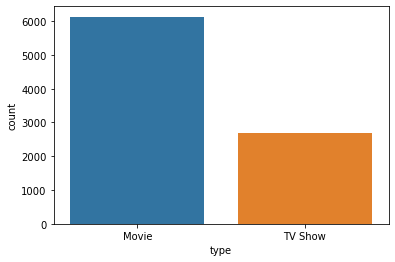

In [41]:
sns.countplot(x='type',data=Cat_An)

#### The 'type' category clearly shows that there are more movies than there are TV shows available on netflix (almost 7:3 ratio ), which hints towards the predilection of viewers towards movies - making movies the preferred choice to be added

In [42]:
Cat_An['director'].value_counts()

Unknown Director          2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
                          ... 
B. Subhash                   1
Cody Stokes                  1
Jakub Piątek                 1
Devashish Makhija            1
Pavel Parkhomenko            1
Name: director, Length: 4529, dtype: int64

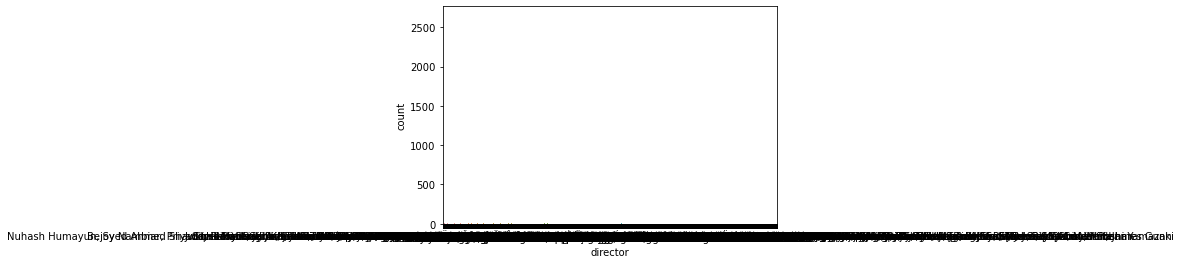

In [43]:
sns.countplot(x='director',data=Cat_An)

#### The data available for directors seems insufficient as almost 40% of the field values are none - thus it's advisable that Netflix updates the data on directors to make more informed decision on which directors' movies are liked the most by the viewers - this will -
#### a) give netflix more information on which movies to add
#### b) give netflix more chance towards gaining more viwers against their competitors.

In [44]:
Cat_An['rating'].value_counts()

TV-MA             3207
TV-14             2160
TV-PG              863
R                  799
PG-13              490
TV-Y7              334
TV-Y               307
PG                 287
TV-G               220
NR                  80
G                   41
TV-Y7-FV             6
Unknown Rating       4
UR                   3
NC-17                3
74 min               1
84 min               1
66 min               1
Name: rating, dtype: int64

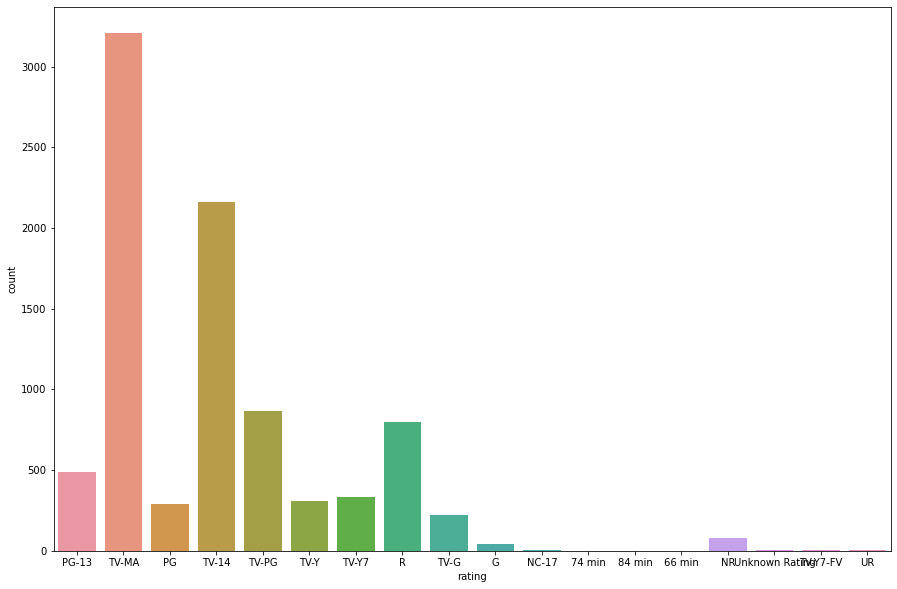

In [45]:
plt.figure(figsize=(15,10))
sns.countplot(x='rating',data=Cat_An)

#### The rating indicates that there are viewers that like more mature content on netflix (Roughly 60% of the added movies / TV Shows shown 14+ rating).

In [46]:
Cat_An['Country'].value_counts()

United States      3211
India              1008
Unknown country     831
United Kingdom      628
Canada              271
                   ... 
Belarus               1
Guatemala             1
Namibia               1
Somalia               1
Cameroon              1
Name: Country, Length: 87, dtype: int64

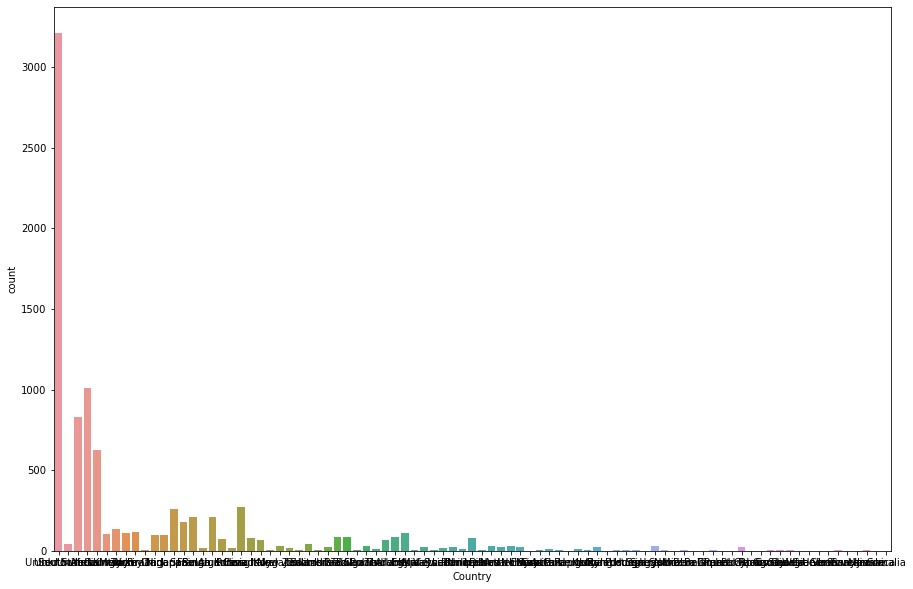

In [47]:
plt.figure(figsize=(15,10))
sns.countplot(x='Country',data=Cat_An)

#### From the above data it can be seen that most of the countries of production of movies / TV Shows available on Netflix are either English speaking or english understanding. 

## Comparison of TV Shows Vs. Movies

In [59]:
TV_Show = pd.DataFrame(final_df[final_df['type']=='TV Show'].groupby('Country')['title'].apply(lambda x: len(list(np.unique(x)))).sort_values(ascending=False))

In [60]:
TV_Show.columns = ['Number of TV Shows']
TV_Show.head(10)

,Number of TV Shows
Country,
United States,847
Unknown country,391
United Kingdom,246
Japan,174
South Korea,164
United States,91
Canada,84
India,81
Taiwan,70


In [61]:
TV_Show.drop(index='Unknown country',inplace=True)
N_TV = TV_Show.head(10)

In [62]:
TV_Show['Number of TV Shows'].sum()

2640

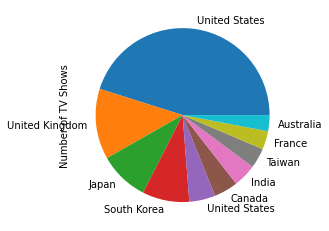

In [64]:
N_TV['Number of TV Shows'].plot(kind='pie')

#### We can see that most number of TV Shows are made or produced in US (~ 32%) followed by UK (~10%)  on Netflix.

In [65]:
Movies = pd.DataFrame(final_df[final_df['type']=='Movie'].groupby('Country')['title'].apply(lambda x: len(list(np.unique(x)))).sort_values(ascending=False))

In [66]:
Movies.columns = ['Number of Movies']
Movies.head(10)

,Number of Movies
Country,
United States,2364
India,927
Unknown country,440
United States,388
United Kingdom,382
Canada,187
France,155
United Kingdom,152
France,148


In [68]:
Movies.drop(index='Unknown country',inplace=True)
N_Movies = Movies.head(10)

In [70]:
N_Movies

,Number of Movies
Country,
United States,2364
India,927
United States,388
United Kingdom,382
Canada,187
France,155
United Kingdom,152
France,148
Canada,132


In [71]:
Movies['Number of Movies'].sum()

7379

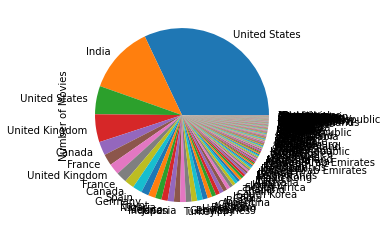

In [72]:
Movies['Number of Movies'].plot(kind='pie')

In [73]:
#EXAMPLE
final_df[(final_df['type']=='Movie') & (final_df['Country']=='India')]['title'].nunique()

927

#### Most number of movies on Netflix originate from English speaking countries (United States, United Kingdom, Canada) and mostly English understanding countries (India).

# Let's find out the best time to launch a TV Show and Movies

In [74]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186399 entries, 0 to 186398
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       186399 non-null  object
 1   type          186399 non-null  object
 2   title         186399 non-null  object
 3   director      186399 non-null  object
 4   date_added    186399 non-null  object
 5   release_year  186399 non-null  int64 
 6   rating        186399 non-null  object
 7   duration      186399 non-null  object
 8   description   186399 non-null  object
 9   Cast          186399 non-null  object
 10  Listed_in     186399 non-null  object
 11  Country       186399 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.5+ MB


#### We can see from the above information that the date_added column that we may use in extracting the information related with best time to launch a TV Show or a Movie is of 'object' datatype. Thus we will have to convert the datatype of this column to datetime datatype to make the analysis more appropriate and simpler. 

In [75]:
#conversion to datetime - date_added column
final_df['date_added'] = pd.to_datetime(final_df['date_added'], errors='ignore')
final_df['date_added'] = pd.to_datetime(final_df['date_added'], errors='coerce')

In [76]:
final_df.info() 
# to check the change in datatype of the two columns - date_added and release_year 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186399 entries, 0 to 186398
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       186399 non-null  object        
 1   type          186399 non-null  object        
 2   title         186399 non-null  object        
 3   director      186399 non-null  object        
 4   date_added    186241 non-null  datetime64[ns]
 5   release_year  186399 non-null  int64         
 6   rating        186399 non-null  object        
 7   duration      186399 non-null  object        
 8   description   186399 non-null  object        
 9   Cast          186399 non-null  object        
 10  Listed_in     186399 non-null  object        
 11  Country       186399 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 18.5+ MB


In [77]:
# creating columns to determine week and month
final_df['week'] = final_df['date_added'].dt.week
final_df['month'] = final_df['date_added'].dt.month

In [78]:
final_df.head(2)

,show_id,type,title,director,date_added,release_year,rating,duration,description,Cast,Listed_in,Country,week,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Unknown Actor,Documentaries,United States,38.0,9.0
1,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,South Africa,38.0,9.0


In [79]:
week_of_year_TV = pd.DataFrame(final_df[final_df['type']=='TV Show'].groupby('week')['title'].apply(lambda x: len(list(np.unique(x)))).sort_values(ascending=False)).reset_index()

In [80]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186399 entries, 0 to 186398
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       186399 non-null  object        
 1   type          186399 non-null  object        
 2   title         186399 non-null  object        
 3   director      186399 non-null  object        
 4   date_added    186241 non-null  datetime64[ns]
 5   release_year  186399 non-null  int64         
 6   rating        186399 non-null  object        
 7   duration      186399 non-null  object        
 8   description   186399 non-null  object        
 9   Cast          186399 non-null  object        
 10  Listed_in     186399 non-null  object        
 11  Country       186399 non-null  object        
 12  week          186241 non-null  float64       
 13  month         186241 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage:

In [81]:
week_of_year_TV.columns = ['Week','Number of TV Shows']
week_of_year_TV.head(10)

,Week,Number of TV Shows
0,27.0,86
1,31.0,83
2,13.0,76
3,24.0,75
4,44.0,75
5,35.0,74
6,5.0,73
7,26.0,73
8,40.0,72
9,50.0,70


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 <a list of 53 Text major ticklabel objects>)

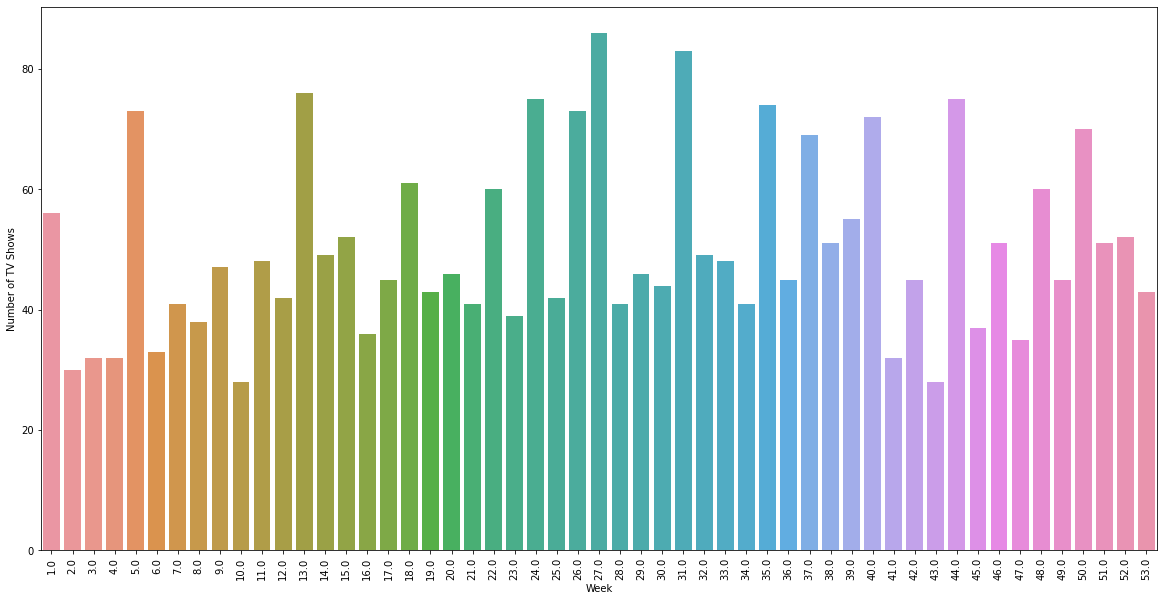

In [82]:
plt.figure(figsize=(20,10))
sns.barplot(x='Week',y='Number of TV Shows',data=week_of_year_TV)
plt.xticks(rotation=90)

#### Although we can't say very evidently that which week is the best to release a TV Show but it can be seen that weeks 27 and 31 stand out in terms of number of TV shows being added. Week 27 is usualy 4th of July which is a public holiday in United States which naturally has higher viewership on Netflix

In [83]:
week_of_year_movie = pd.DataFrame(final_df[final_df['type']=='Movie'].groupby('week')['title'].apply(lambda x: len(list(np.unique(x)))).sort_values(ascending=False)).reset_index()

In [84]:
week_of_year_movie.columns = ['Week','Number of Movies']
week_of_year_movie.head(10)

,Week,Number of Movies
0,1.0,316
1,44.0,243
2,40.0,215
3,9.0,207
4,26.0,195
5,35.0,189
6,31.0,185
7,13.0,174
8,18.0,173
9,27.0,154


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 <a list of 53 Text major ticklabel objects>)

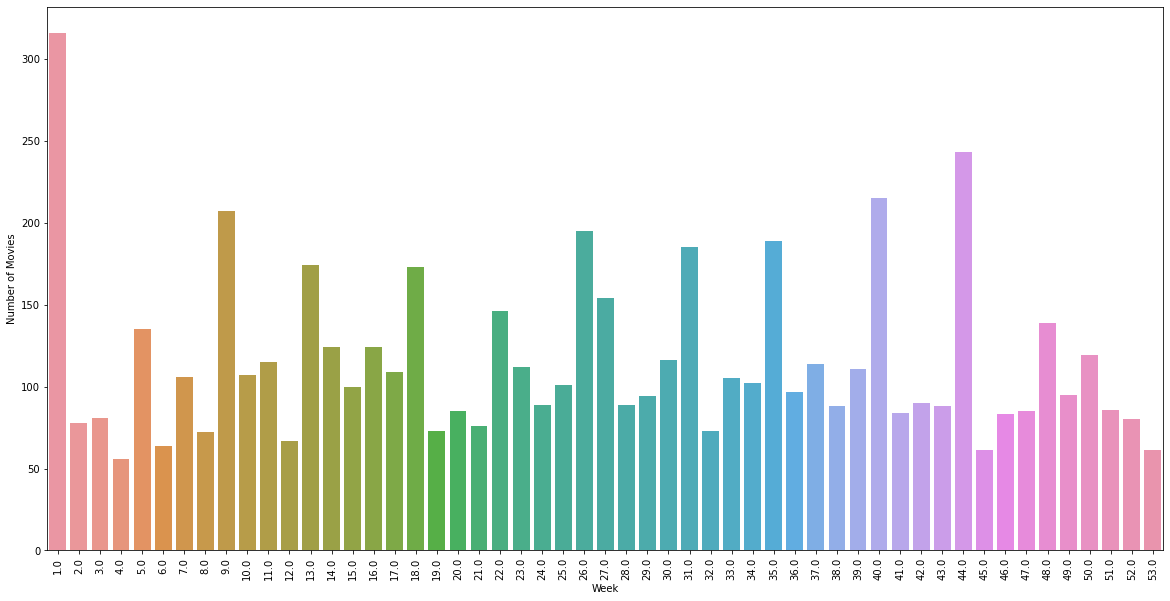

In [85]:
plt.figure(figsize=(20,10))
sns.barplot(x='Week',y='Number of Movies',data=week_of_year_movie)
plt.xticks(rotation=90)

#### But for a movie we can say that the first week is the best time for netflix to launch a movie.

In [86]:
month_of_year_TV = pd.DataFrame(final_df[final_df['type']=='TV Show'].groupby('month')['title'].apply(lambda x: len(list(np.unique(x)))).sort_values(ascending=False)).reset_index()

In [87]:
month_of_year_TV.columns = ['Month','Number of TV Shows']
month_of_year_TV.head(10)

,Month,Number of TV Shows
0,12.0,266
1,7.0,262
2,9.0,251
3,8.0,236
4,6.0,236
5,10.0,215
6,4.0,214
7,3.0,213
8,11.0,207
9,5.0,193


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

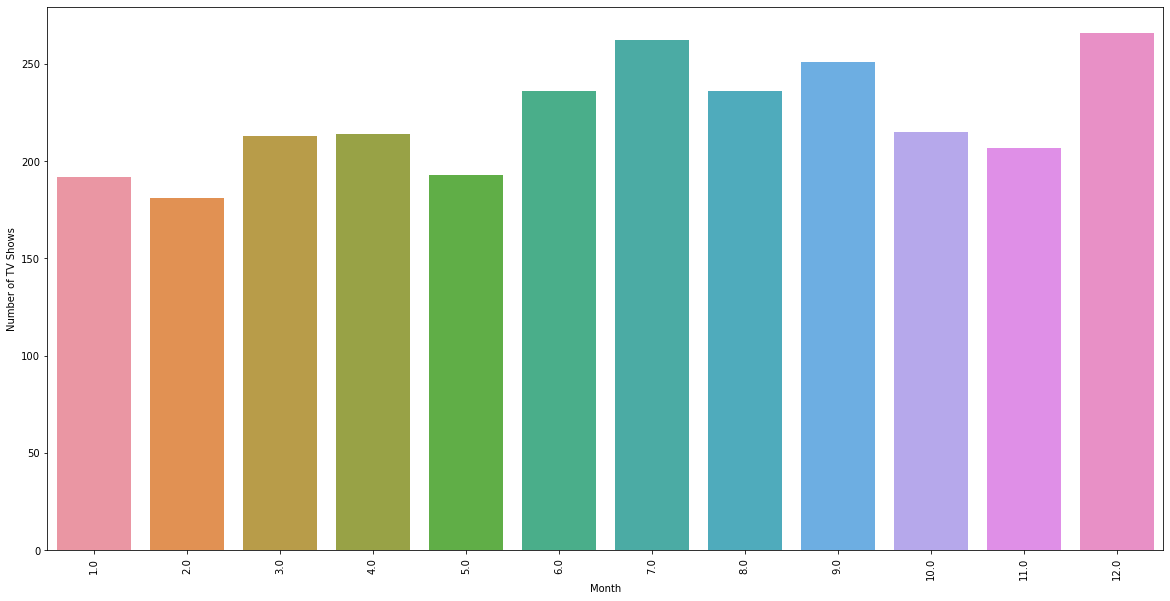

In [88]:
plt.figure(figsize=(20,10))
sns.barplot(x='Month',y='Number of TV Shows',data=month_of_year_TV)
plt.xticks(rotation=90)

#### Same in case of month as in case of week in respect of TV Show - the week in which the TV show is added doesn't affect the output.

In [89]:
month_of_year_movie = pd.DataFrame(final_df[final_df['type']=='Movie'].groupby('month')['title'].apply(lambda x: len(list(np.unique(x)))).sort_values(ascending=False)).reset_index()

In [90]:
month_of_year_movie.columns = ['Month','Number of Movies']
month_of_year_movie.head(10)

,Month,Number of Movies
0,7.0,565
1,4.0,550
2,12.0,547
3,1.0,546
4,10.0,545
5,3.0,529
6,9.0,519
7,8.0,519
8,11.0,498
9,6.0,492


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

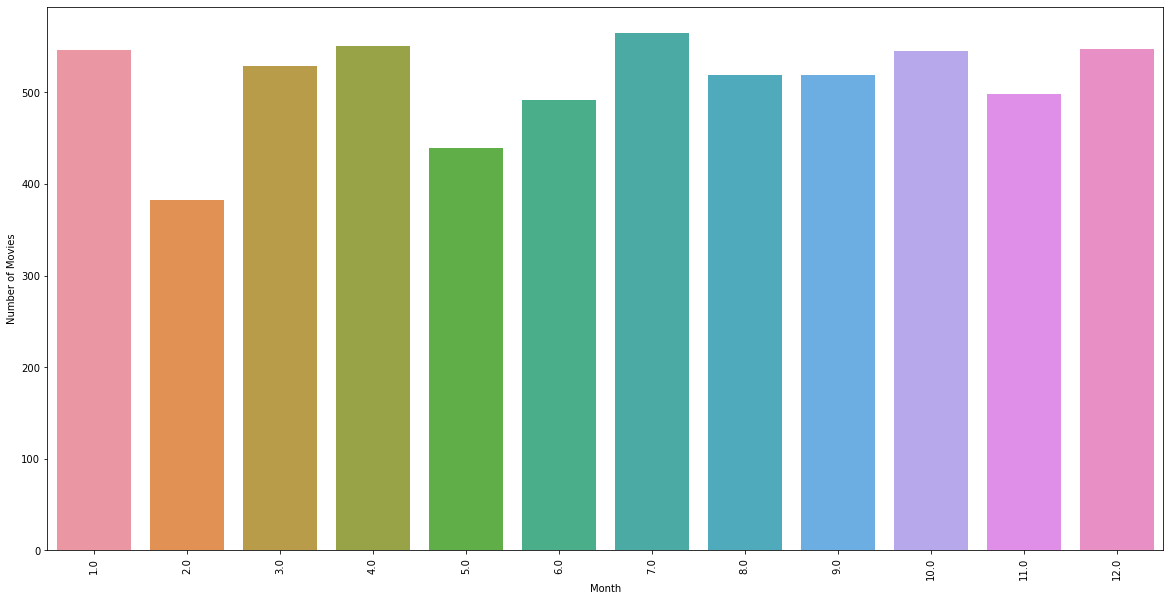

In [91]:
plt.figure(figsize=(20,10))
sns.barplot(x='Month',y='Number of Movies',data=month_of_year_movie)
plt.xticks(rotation=90)

#### unlike weeks, months don't matter in terms of launching a movie in Netflix.

In [92]:
month_of_year_movie['Number of Movies'].sum() + month_of_year_TV['Number of TV Shows'].sum() + 10

8807

## Top Actors / Directors

In [93]:
Actor = pd.DataFrame(final_df.groupby('Cast')['title'].apply(lambda x: len(list(np.unique(x)))).sort_values(ascending=False))

In [94]:
Actor.columns = ['Number of Movies/TV Shows'] 
Actor.head()

,Number of Movies/TV Shows
Cast,
Unknown Actor,825
Anupam Kher,39
Rupa Bhimani,31
Takahiro Sakurai,30
Julie Tejwani,28


In [95]:
# ignoring the unknown actor field and finding the top 10 actors to be appearing in the most number of movies / TV shows
Actor.iloc[1:11]

,Number of Movies/TV Shows
Cast,
Anupam Kher,39
Rupa Bhimani,31
Takahiro Sakurai,30
Julie Tejwani,28
Om Puri,27
Rajesh Kava,26
Shah Rukh Khan,26
Boman Irani,25
Andrea Libman,25


#### Anupam Kher leads the chart in the most number of TV Shows / Movies done by an actor. But, the data is certainly insufficient as a major chunk of it has null values - Thus it is advisable to Netflix to update their dataset to make more informed decision on which actors' movies / TV Show to be added.

In [96]:
Director = pd.DataFrame(final_df.groupby('director')['title'].apply(lambda x: len(list(np.unique(x)))).sort_values(ascending=False))

In [97]:
Director.columns = ['Number of Movies/TV Shows'] 
Director.head()

,Number of Movies/TV Shows
director,
Unknown Director,2634
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16


In [98]:
# ignoring the unknown director field and finding the top 10 directors based on the most number of movies / TV shows
Director.iloc[1:11]

,Number of Movies/TV Shows
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12
Jay Chapman,12
Martin Scorsese,12


#### Again, this data is insufficient to conclude definitively. 

## Determining the most popular genres

In [99]:
df_wordcloud = pd.read_csv(r"C:\Users\bsbha\OneDrive\Desktop\Scaler\Sacler Case Studies\Case Study 2 - Netflix\netflix.csv", usecols=['listed_in'])
df_wordcloud.head()

,listed_in
0,Documentaries
1,"International TV Shows, TV Dramas, TV Mysteries"
2,"Crime TV Shows, International TV Shows, TV Act..."
3,"Docuseries, Reality TV"
4,"International TV Shows, Romantic TV Shows, TV ..."


In [100]:
text = " ".join(item for item in df['listed_in'])
text = text.split(',')

In [101]:
df_word = pd.DataFrame(text)
df_word.columns = ['Description']
df_word

,Description
0,Documentaries International TV Shows
1,TV Dramas
2,TV Mysteries Crime TV Shows
3,International TV Shows
4,TV Action & Adventure Docuseries
...,...
10512,TV Comedies Comedies
10513,Horror Movies Children & Family Movies
10514,Comedies Dramas
10515,International Movies


In [102]:
text = " ".join(item for item in df_word['Description'])
text

"Documentaries International TV Shows  TV Dramas  TV Mysteries Crime TV Shows  International TV Shows  TV Action & Adventure Docuseries  Reality TV International TV Shows  Romantic TV Shows  TV Comedies TV Dramas  TV Horror  TV Mysteries Children & Family Movies Dramas  Independent Movies  International Movies British TV Shows  Reality TV Comedies  Dramas Crime TV Shows  Docuseries  International TV Shows Crime TV Shows  International TV Shows  TV Action & Adventure Dramas  International Movies Children & Family Movies  Comedies British TV Shows  Crime TV Shows  Docuseries TV Comedies  TV Dramas Documentaries  International Movies Crime TV Shows  Spanish-Language TV Shows  TV Dramas Thrillers International TV Shows  Spanish-Language TV Shows  TV Action & Adventure Crime TV Shows  Docuseries  International TV Shows International TV Shows  TV Action & Adventure  TV Dramas Comedies  International Movies Children & Family Movies Comedies  International Movies  Romantic Movies Docuseries  I

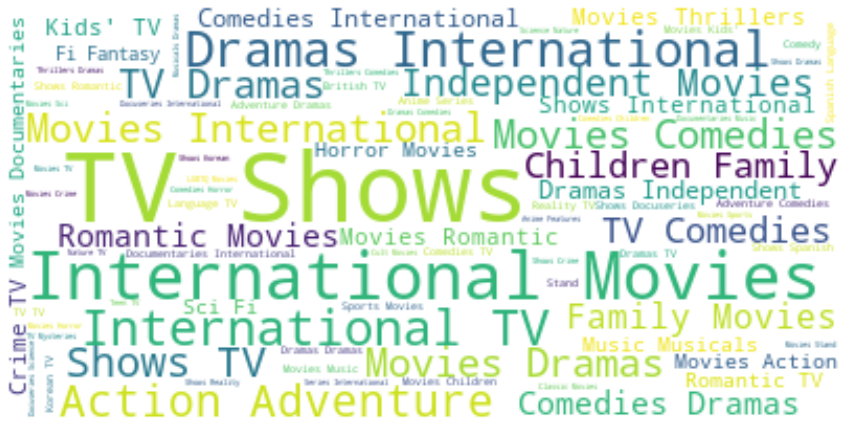

In [103]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### The most famous genre as can be seen is TV Shows, International Movies, Dramas etc.

# Days after which the movie will be added to Netflix!

In [104]:
final_df.head(2)

,show_id,type,title,director,date_added,release_year,rating,duration,description,Cast,Listed_in,Country,week,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Unknown Actor,Documentaries,United States,38.0,9.0
1,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,South Africa,38.0,9.0


In [105]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186399 entries, 0 to 186398
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       186399 non-null  object        
 1   type          186399 non-null  object        
 2   title         186399 non-null  object        
 3   director      186399 non-null  object        
 4   date_added    186241 non-null  datetime64[ns]
 5   release_year  186399 non-null  int64         
 6   rating        186399 non-null  object        
 7   duration      186399 non-null  object        
 8   description   186399 non-null  object        
 9   Cast          186399 non-null  object        
 10  Listed_in     186399 non-null  object        
 11  Country       186399 non-null  object        
 12  week          186241 non-null  float64       
 13  month         186241 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage:

In [106]:
final_df['release_year'] = pd.to_datetime(final_df.release_year, format='%Y')

In [107]:
final_df.head()

,show_id,type,title,director,date_added,release_year,rating,duration,description,Cast,Listed_in,Country,week,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020-01-01,PG-13,90 min,"As her father nears the end of his life, filmm...",Unknown Actor,Documentaries,United States,38.0,9.0
1,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021-01-01,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,South Africa,38.0,9.0
2,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021-01-01,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Dramas,South Africa,38.0,9.0
3,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021-01-01,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Mysteries,South Africa,38.0,9.0
4,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021-01-01,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,International TV Shows,South Africa,38.0,9.0


In [108]:
final_df['diff_days'] = (final_df['date_added'] - final_df['release_year'])

In [109]:
Ana_data = final_df.drop_duplicates(subset=['show_id'])

In [110]:
Ana_data

,show_id,type,title,director,date_added,release_year,rating,duration,description,Cast,Listed_in,Country,week,month,diff_days
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020-01-01,PG-13,90 min,"As her father nears the end of his life, filmm...",Unknown Actor,Documentaries,United States,38.0,9.0,633 days
1,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021-01-01,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,South Africa,38.0,9.0,266 days
58,s3,TV Show,Ganglands,Julien Leclercq,2021-09-24,2021-01-01,TV-MA,1 Season,To protect his family from a powerful drug lor...,Sami Bouajila,Crime TV Shows,Unknown country,38.0,9.0,266 days
85,s4,TV Show,Jailbirds New Orleans,Unknown Director,2021-09-24,2021-01-01,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",Unknown Actor,Docuseries,Unknown country,38.0,9.0,266 days
87,s5,TV Show,Kota Factory,Unknown Director,2021-09-24,2021-01-01,TV-MA,2 Seasons,In a city of coaching centers known to train I...,Mayur More,International TV Shows,India,38.0,9.0,266 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186310,s8803,Movie,Zodiac,David Fincher,2019-11-20,2007-01-01,R,158 min,"A political cartoonist, a crime reporter and a...",Mark Ruffalo,Cult Movies,United States,47.0,11.0,4706 days
186340,s8804,TV Show,Zombie Dumb,Unknown Director,2019-07-01,2018-01-01,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g...",Unknown Actor,Kids' TV,Unknown country,27.0,7.0,546 days
186343,s8805,Movie,Zombieland,Ruben Fleischer,2019-11-01,2009-01-01,R,88 min,Looking to survive in a world taken over by zo...,Jesse Eisenberg,Comedies,United States,44.0,11.0,3956 days
186357,s8806,Movie,Zoom,Peter Hewitt,2020-01-11,2006-01-01,PG,88 min,"Dragged from civilian life, a former superhero...",Tim Allen,Children & Family Movies,United States,2.0,1.0,5123 days


In [111]:
Ana_data = final_df[final_df['release_year'] >= '2018-01-01']

In [112]:
Ana_data.head()

,show_id,type,title,director,date_added,release_year,rating,duration,description,Cast,Listed_in,Country,week,month,diff_days
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,2021-09-25,2020-01-01,PG-13,90 min,"As her father nears the end of his life, filmm...",Unknown Actor,Documentaries,United States,38.0,9.0,633 days
1,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021-01-01,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,International TV Shows,South Africa,38.0,9.0,266 days
2,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021-01-01,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Dramas,South Africa,38.0,9.0,266 days
3,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021-01-01,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,TV Mysteries,South Africa,38.0,9.0,266 days
4,s2,TV Show,Blood & Water,Unknown Director,2021-09-24,2021-01-01,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,International TV Shows,South Africa,38.0,9.0,266 days


In [113]:
final_df['diff_days'].mode()

0   243 days
dtype: timedelta64[ns]

#### As can be seen from the above output that a movie / TV Show is added roughly after 7-8 months of release

# Recommendations - 











## 1) The Director field is an important field to figure out which directors movies / TV Shows must be added on to netfix, fixing the domain of the approach. Hence it is important to keep this field updated and avoid null values. This will make sure that Netflix doesn't end up wasting its resources on movies / TV Shows of the directors whose movie / TV Show has no viewers interest. 


## 2) We noticed that more movies than TV shows are added in Netflix but on genre analysis it is observed that TV Shows have a lot of popularity as well. Thus adding more quality content TV Shows might benefit Netflix in long run.


## 3) The added TV shows might have a rating of 14+, as we saw that mature content is more likely be watched.


## 4) More insightful knowledge might be gained if instead of release year, the exact date of release of movies / TV Shows is mentioned in the database.


## 5) A lot of data from US / UK / India is added in Netflix. To increase the reach of Netflix, content from other countries / region may be added.

## 6) Netflix can increase its investment in producing content from regions that have strong cultural appeal to hold a worldwide penetration. Partnering with local producers can help netflix in attaining the same.